# 🩺 Heart Disease Prediction - Data Preparation

**Objective**: Load and prepare the Heart Disease dataset (`processed.cleveland.data`)  
for machine learning classification.  
We will:
1. Load dataset
2. Assign column names
3. Handle missing values
4. Split into train/test
5. Apply feature scaling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
file_path = "processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "target"
]

df = pd.read_csv(file_path, names=columns)

In [4]:
print("Shape:", df.shape)
print(df.info())
print("\nMissing values:\n", df.isna().sum())

Shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0

In [5]:
df = df.drop_duplicates()

In [6]:
for col in df.columns:
    if df[col].dtype == "object":  # categorical
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # numerical
        df[col] = df[col].fillna(df[col].median())


In [7]:
for col in df.select_dtypes(include=[np.number]).columns:
    df = df[df[col] >= 0]  # remove negatives

In [8]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower, upper)

In [9]:
print("\nMissing values after cleaning:\n", df.isna().sum())
print("Final shape:", df.shape)


Missing values after cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Final shape: (303, 14)


In [10]:
print(df.head())
print(df.dtypes)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.5     145.0  233.0  0.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object


In [11]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df.dropna(inplace=True)
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("Final shape:", df.shape)

print(df.dtypes)


Missing values after cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Final shape: (297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


target
0    160
1    137
Name: count, dtype: int64


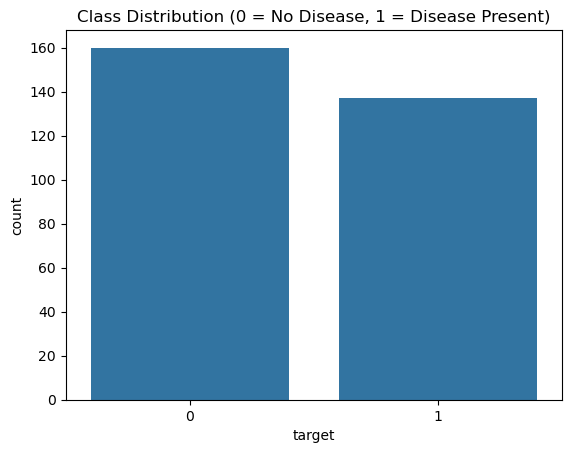

In [12]:
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

print(df["target"].value_counts())
sns.countplot(x="target", data=df)
plt.title("Class Distribution (0 = No Disease, 1 = Disease Present)")
plt.show()

In [13]:
# To get descriptive statistics for the heart disease dataset
print("Descriptive Statistics for Heart Disease Data:")
print(df.describe())

Descriptive Statistics for Heart Disease Data:
              age         sex         cp    trestbps        chol    fbs  \
count  297.000000  297.000000  297.00000  297.000000  297.000000  297.0   
mean    54.542088    0.676768    3.19697  131.343434  246.218855    0.0   
std      9.049736    0.468500    0.88384   16.801401   47.725382    0.0   
min     29.000000    0.000000    1.50000   94.000000  126.000000    0.0   
25%     48.000000    0.000000    3.00000  120.000000  211.000000    0.0   
50%     56.000000    1.000000    3.00000  130.000000  243.000000    0.0   
75%     61.000000    1.000000    4.00000  140.000000  276.000000    0.0   
max     77.000000    1.000000    4.00000  170.000000  371.000000    0.0   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.645623    0.326599    1.040067    1.602694    0.676768   
std      0.994914   22.795823    0

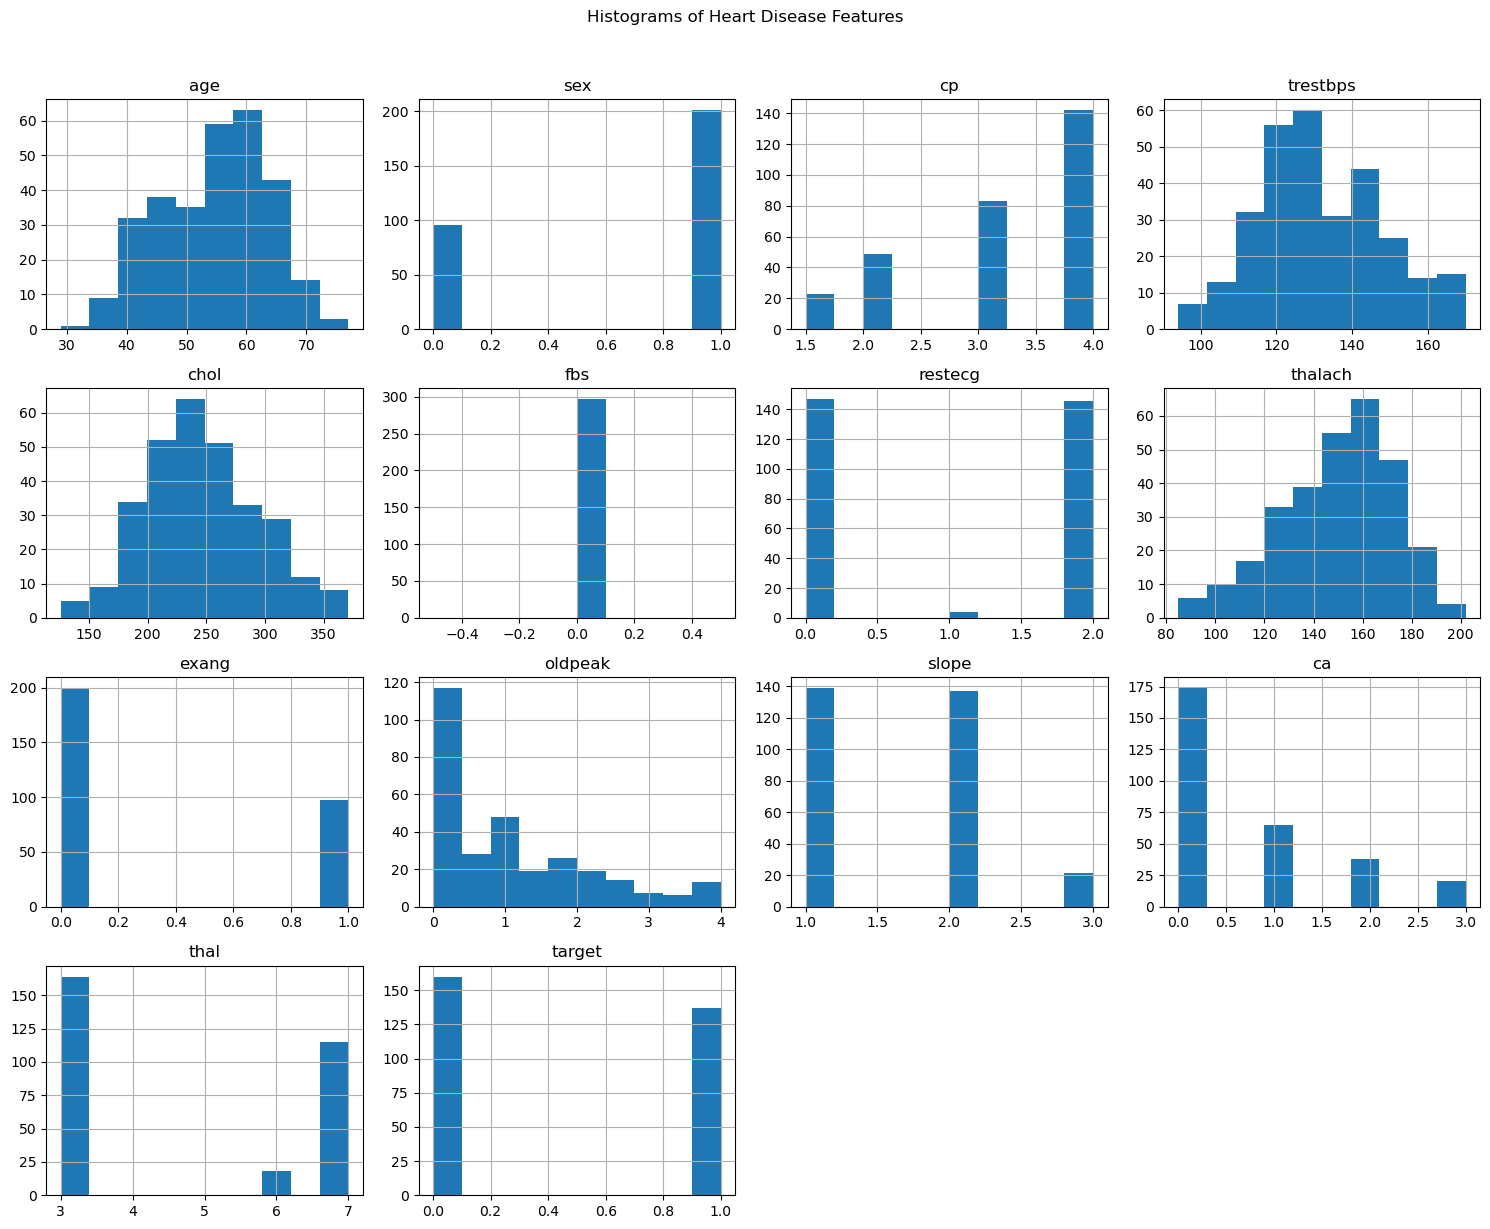

In [14]:
import matplotlib.pyplot as plt

# Histograms for heart disease data
df.hist(figsize=(15, 12))
plt.suptitle('Histograms of Heart Disease Features', y=1.02)
plt.tight_layout()
plt.show()

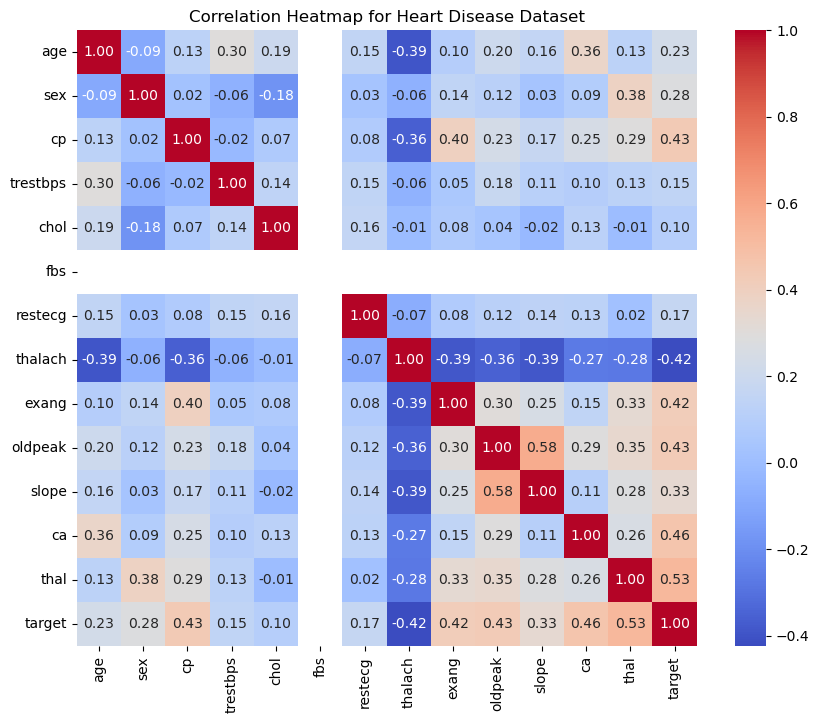

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for heart disease data
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Heart Disease Dataset')
plt.show()

Data Preparation

In [17]:
X = df.drop("target", axis=1)
y = df["target"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (237, 13) Test size: (60, 13)


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFirst 5 rows of scaled X_train:\n", X_train_scaled[:5])


First 5 rows of scaled X_train:
 [[-0.08566824  0.69372185  0.88925734 -0.46870355  0.3765145   0.
   1.02352298 -1.82744829  1.37486141  1.03728794  0.67297154  0.34940405
   1.13154763]
 [-0.97324741  0.69372185 -1.40154689 -1.83642468 -1.06611474  0.
  -0.98954711  0.27543875 -0.72734604 -0.93514799 -0.95452086 -0.7401849
   1.13154763]
 [-1.3060896   0.69372185 -0.25614478 -0.11190674  1.40099033  0.
  -0.98954711  0.54389241 -0.72734604  0.76831941 -0.95452086  0.34940405
  -0.93135074]
 [-0.86230002  0.69372185 -0.25614478  0.36382235  0.18834547  0.
   1.02352298  0.27543875 -0.72734604 -0.93514799 -0.95452086 -0.7401849
  -0.93135074]
 [ 0.35812134  0.69372185  0.88925734  1.07741598  0.46014518  0.
   1.02352298 -1.73796374  1.37486141 -0.21789856 -0.95452086 -0.7401849
   1.13154763]]


Model Building and Evaluation (Logistic Regression)

In [68]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

y_probs = model.predict_proba(X_test_scaled)[:, 1]

best_f1, best_thresh = 0, 0
for thresh in np.arange(0.1, 0.9, 0.05):
    y_pred = (y_probs >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    print(f"Thresh={thresh:.2f} | F1={f1:.4f} | Precision={prec:.4f} | Recall={rec:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f"\nBest Threshold: {best_thresh}, Best F1: {best_f1:.4f}")


Thresh=0.10 | F1=0.8485 | Precision=0.7368 | Recall=1.0000
Thresh=0.15 | F1=0.8889 | Precision=0.8000 | Recall=1.0000
Thresh=0.20 | F1=0.8525 | Precision=0.7879 | Recall=0.9286
Thresh=0.25 | F1=0.8667 | Precision=0.8125 | Recall=0.9286
Thresh=0.30 | F1=0.8475 | Precision=0.8065 | Recall=0.8929
Thresh=0.35 | F1=0.7857 | Precision=0.7857 | Recall=0.7857
Thresh=0.40 | F1=0.8148 | Precision=0.8462 | Recall=0.7857
Thresh=0.45 | F1=0.8148 | Precision=0.8462 | Recall=0.7857
Thresh=0.50 | F1=0.8302 | Precision=0.8800 | Recall=0.7857
Thresh=0.55 | F1=0.8462 | Precision=0.9167 | Recall=0.7857
Thresh=0.60 | F1=0.8400 | Precision=0.9545 | Recall=0.7500
Thresh=0.65 | F1=0.8163 | Precision=0.9524 | Recall=0.7143
Thresh=0.70 | F1=0.8163 | Precision=0.9524 | Recall=0.7143
Thresh=0.75 | F1=0.8163 | Precision=0.9524 | Recall=0.7143
Thresh=0.80 | F1=0.7660 | Precision=0.9474 | Recall=0.6429
Thresh=0.85 | F1=0.7391 | Precision=0.9444 | Recall=0.6071

Best Threshold: 0.15000000000000002, Best F1: 0.8889


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# --- Custom threshold ---
y_probs = model.predict_proba(X_test_scaled)[:, 1]   # probabilities for class 1
threshold = 0.15   # try 0.4, 0.35 etc.
y_pred = (y_probs >= threshold).astype(int)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nHeart Disease Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)



Heart Disease Model Performance Metrics:
Accuracy: 0.8833
Precision: 0.8000
Recall: 1.0000

Confusion Matrix:
[[25  7]
 [ 0 28]]


In [23]:
import joblib

# Save trained model
joblib.dump(model, "heart_model.pkl")

# Save the scaler
joblib.dump(scaler, "heart_scaler.pkl")

# Save feature names (important for new data)
joblib.dump(list(X_train.columns), "heart_features.pkl")


['heart_features.pkl']